## Optimisation and Heuristic Search



## 1.1 Solution Representation & Objective Function

### Solution Representation & Encoding


We will represent this solution in the form of a binary list (0, 1) where 0's represent Anne's pictures and 1's represent Bob's pictures. 

For example, with 6 pictures of values [1000, 280, 420, 175, 650, 40].

A potential solution is: 
[1, 0, 0, 1, 1, 0]

In this case, Bob's total would be 1000 + 175 + 650 = 1825 and Anne's would be 280 + 420 + 40 = 740.

The fairness of this solution as defined below is:

$fairness = |740 - 1825| = 1085$

As can be seen, this solution is biased towards Bob.


### Quantitative Metric

The metric for quantifying the quality of a solution can be shown below, which we will refer to as fairness:

$fairness = |total1 - total2|$

We will compare each candidate solution's fairness and the one which has the smallest absolute difference will be considered the most fair solution.

We have chosen the absolute value to eliminate negative fairness results as the order in which the totals will be subtracted is unknown.

## Reading Picture Values from File

In [1]:
def read_pictures_data(file_name):
    """
    Reads CSV file containing picture values and returns those values
    as a list of integers.


    Parameters:
        file_name (str): The string which is to be reversed.

    Returns:
        values (list): A list of the picture values as integers  
    """

    with open(file_name, 'r') as picture_file:
        lines = picture_file.readlines()

        # Values are on the second line
        value_line = lines[1]

        # Makes each value an integer and creates a list, splitting by comma
        values = list(map(int, value_line.split(',')))

    return values

In [2]:
picture_file_path = "values50.csv"

picture_values = read_pictures_data(picture_file_path)

print(picture_values)

# This represents the total amount of pictures, it is the equivalent to "n" for this problem
num_pictures = len(picture_values)

[281783, 132345, 534919, 247294, 1039003, 942652, 990371, 796111, 440308, 196838, 1023110, 59449, 817489, 907579, 4417, 934045, 558536, 479750, 214386, 665699, 64152, 46813, 53364, 19305, 799444, 454242, 885243, 60903, 464922, 918317, 1039794, 488814, 724987, 484163, 458818, 963859, 607717, 45068, 872793, 209716, 389874, 621576, 253525, 697713, 885223, 398144, 636210, 595926, 1047239, 824923]


## 1.2 Heuristic Search Functions

## Shared Functions

### This contains the evaluate(), calculate_individual_totals() and random_solution() functions, which are used in both Heuristic Search Functions 

In [3]:
import random as rnd

def random_solution(size):
    """
    Generates and returns a random solution in the form of a binary list (0, 1).

    Parameters:
        size (int): The size of the solution to generate

    Returns:
        sol (list): The binary list representing the generated solution
    """

    solution = [] 
    
    for i in range(size):
        rnd_choice = rnd.randint(0, 1)
      
        solution.append(rnd_choice)
        
    return solution

def calculate_individual_totals(solution):
    """
    Calculates and returns the invididual picture value totals for Anne and Bob

    Parameters:
        solution (list): The solution to calculate the totals from

    Returns:
        anne_total (int): Anne's picture value total
        bob_total (int): Bob's picture value total
    """

    bob_total = 0

    anne_total = 0

    solution_length = len(solution)

    for i in range(solution_length):
        if solution[i] == 0:
            anne_total += picture_values[i]
        else:
            bob_total += picture_values[i]

    return anne_total, bob_total


def evaluate(solution):
    """
    Evaluates and returns the fairness of picture split between Anne and Bob.

    Parameters:
        solution (list): The solution to evaluate the fairness from

    Returns:
        fairness (int): The fairness evaluated from the picture split (the absolute difference)
    """

    anne_total, bob_total = calculate_individual_totals(solution)

    fairness = abs(anne_total - bob_total)

    return fairness

## Random Search Function

### This includes the random_search() function which is used by Random Search

In [4]:
def random_search(iterations):
    """
    Performs a random search over the provided number of tries to locate
    the solution which has the best fairness. This works by generating random solutions and
    comparing them to each other. The best solution and best fairness found will be returned
    at the end.

    Parameters:
        iterations (int): The number of tries/iterations to perform the search for

    Returns:
        best_solution (list): A binary list representing the best solution found 
        best_fairness (int): The best fairness found, corresponding to the best solution
    """

    # We must start off by evaluating an initial solution, or we will not be able to compare accurately
    starting_solution = random_solution(num_pictures)

    best_solution = starting_solution
    
    best_fairness = evaluate(starting_solution)
    
    for i in range(iterations):
        current_solution = random_solution(num_pictures)
        
        current_fairness = evaluate(current_solution)
        
        if current_fairness < best_fairness:
            best_fairness = current_fairness
            
            best_solution = current_solution[:]

    return best_solution, best_fairness

## Hill Climbing Functions

### This includes the neighbour() and hill_climbing() functions which are used by Hill Climbing

In [5]:
import random as rnd

def neighbour(solution):
    """
    Performs a 1 bit flip operation on a given solution to create a neighbour solution
    which can be used in hill climbing. This will choose a random position 
    and invert the number 0 -> 1 or 1 -> 0 respectively.

    Parameters:
        solution (list): The solution to perform the 1 bit flip operation on

    Returns:
        solution (list): The resulting neighbour solution from performing the bit flip
    """

    rnd_pos = rnd.randint(0, len(solution) - 1)
    
    solution[rnd_pos] = 0 if solution[rnd_pos] else 1
    
    return solution

def hill_climbing(iterations):
    """
    Performs hill climbing search over the provided number of iterations to locate
    the solution which has the best fairness. This works by generating a random solution
    and then performing a 1 bit flip on that solution. Neighbour solutions are then compared.
    The best solution, best fairness and list of the best fairnesses found will be returned
    at the end.

    Parameters:
        iterations (int): The number of iterations to perform the hill climb for

    Returns:
        best_solution (list): A binary list representing the best solution found 
        best_fairness (int): The best fairness found, corresponding to the best solution
        list_fairness (list): The list of best fairnesses found during the search
    """

    list_fairnesses = []
    
    best_solution = random_solution(num_pictures)

    best_fairness = evaluate(best_solution)
    
    list_fairnesses.append(best_fairness)
    
    # Running for fixed amount of iterations in this example
    for i in range(iterations):
        neighbour_solution = neighbour(best_solution[:])
        
        neighbour_fairness = evaluate(neighbour_solution)
        
        if neighbour_fairness < best_fairness:
            best_solution = neighbour_solution[:]
            
            best_fairness = neighbour_fairness
            
            list_fairnesses.append(best_fairness)
    
    return best_solution, best_fairness, list_fairnesses

## 1.3 Experimental Results

### Testing Random Search & Hill Climbing

## Random Search

### A test of Random Search ran over 1000 iterations showing the split and totals for Anne and Bob

In [6]:
# We will reread the picture file and data so that these cells can be ran independently
picture_file_path = "values50.csv"

picture_values = read_pictures_data(picture_file_path)

num_pictures = len(picture_values)

# The number of iterations to run Random Search for
iterations = 1000

# Retrieving the best solution and fairness for random search
best_solution, best_fairness = random_search(iterations)

print(f"The best solution found was:\n{best_solution}")

print(f"The best fairness found was: £{best_fairness}")

# As Anne's values are based on zeros, create a list containing only their values
annes_split = [i for i in best_solution if i == 0]

# As Bob's values are based on ones, create a list containing only their values
bobs_split = [i for i in best_solution if i == 1]

# Get the number of pictures using the length of the split given to Anne
anne_num_pictures = len(annes_split)

# Get the number of pictures using the length of the split given to Anne
bob_num_pictures =  len(bobs_split)

# Calculate the individual totals for Anne and Bob so they can be displayed
annes_total, bobs_total = calculate_individual_totals(best_solution)

print(f"Anne got {anne_num_pictures} pictures and their total picture value was £{annes_total}")

print(f"Bob got {bob_num_pictures} pictures and their total picture value was £{bobs_total}")

The best solution found was:
[0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
The best fairness found was: £739
Anne got 25 pictures and their total picture value was £13639066
Bob got 25 pictures and their total picture value was £13639805


## Random Search 30 Runs Line Plot

### The following plot shows the difference in fairness over 30 runs of Random Search

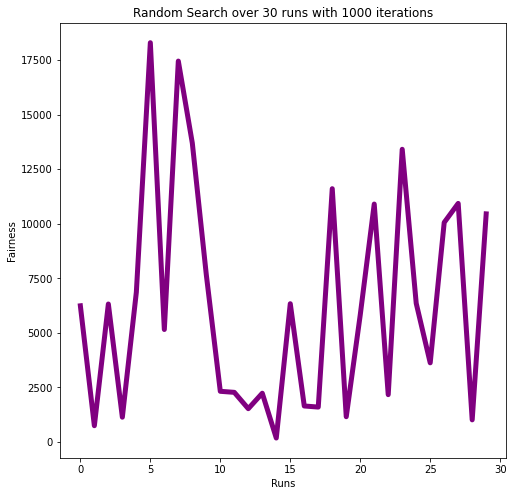

The average fairness over 30 runs with 1000 iterations for Random Search was 6307.33


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 

# The number of iterations to perform Random Search for
iterations = 1000

# The number of runs to loop Random Search for
runs = 30

# A list to store the fairness values returned by
random_search_list_fairness = []

# Loop for the number of runs and appends the fairnesses 
for i in range(runs):
    run_fairness = random_search(iterations)[1]
    
    random_search_list_fairness.append(run_fairness)

# Set the y axis to the list of fairness values returned by random search 
y = random_search_list_fairness

# Plot line plot over 30 runs with 1000 iterations
fig, ax = plt.subplots(figsize=(8, 8))

plt.plot(y, color="purple", linewidth=5)

plt.ylabel("Fairness")

plt.xlabel("Runs")

plt.title("Random Search over 30 runs with 1000 iterations")

plt.show()

# Using numpy get the average fairness over the 30 runs
avg_fairness = np.average(random_search_list_fairness)

print(f"The average fairness over 30 runs with 1000 iterations for Random Search was {avg_fairness:.2f}")

## Hill Climbing

### A test of Hill Climbing ran over 1000 iterations showing the split and totals for Anne and Bob

In [9]:
# We will reread the picture file and data so that these cells can be ran independently
picture_file_path = "values50.csv"

picture_values = read_pictures_data(picture_file_path)

num_pictures = len(picture_values)

# The number of iterations to perform Hill Climbing for
hillclimbing_iterations = 1000

# Retrive the best solution, fairness and the list of best fairnesses
best_solution, best_fairness, hill_climbing_best_fairness = hill_climbing(hillclimbing_iterations)

print(f"The best solution found was:\n{best_solution}")

print(f"The best fairness found was: £{best_fairness}")

# As Anne's values are based on zeros, create a list containing only their values
annes_split = [i for i in best_solution if i == 0]

# As Bob's values are based on ones, create a list containing only their values
bobs_split = [i for i in best_solution if i == 1]

# Get the number of pictures using the length of the split given to Anne
anne_num_pictures = len(annes_split)

# Get the number of pictures using the length of the split given to Anne
bob_num_pictures =  len(bobs_split)

# Calculate the individual totals for Anne and Bob so they can be displayed
annes_total, bobs_total = calculate_individual_totals(best_solution)

print(f"Anne got {anne_num_pictures} pictures and their total picture value was £{annes_total}")

print(f"Bob got {bob_num_pictures} pictures and their total picture value was £{bobs_total}")

The best solution found was:
[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1]
The best fairness found was: £4231
Anne got 28 pictures and their total picture value was £13641551
Bob got 22 pictures and their total picture value was £13637320


## Hill Climbing Single Run Line Plot

### The following plot shows the difference in fairness over a single run of Hill Climbing

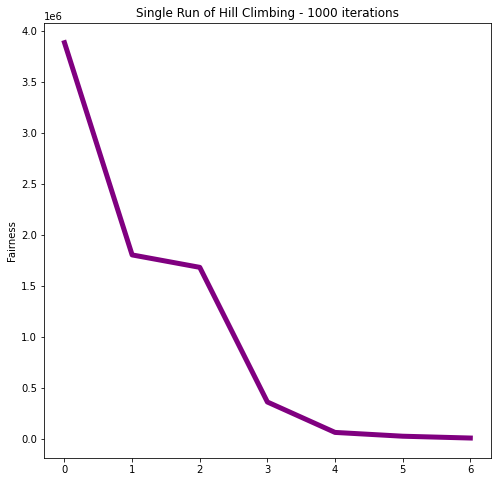

In [10]:
%matplotlib inline  

import matplotlib.pyplot as plt 

# The number of iterations to perform Hill Climbing for
hillclimbing_iterations = 1000

# Perform hill climbing and store the list of best fairnesses
hill_climbing_best_fairness = hill_climbing(hillclimbing_iterations)[2]

# Set the y axis to the list of best fairness values returned by Hill Climbing
y = hill_climbing_best_fairness

# Plot line plot over a single run with 1000 iterations
fig, ax = plt.subplots(figsize=(8, 8))

plt.plot(y, color="purple", linewidth=5)

plt.ylabel("Fairness")

plt.title("Single Run of Hill Climbing - 1000 iterations")

plt.show()

## Hill Climbing 30 Runs Line Plot

### The following plot shows the difference in fairness over 30 runs of Hill Climbing

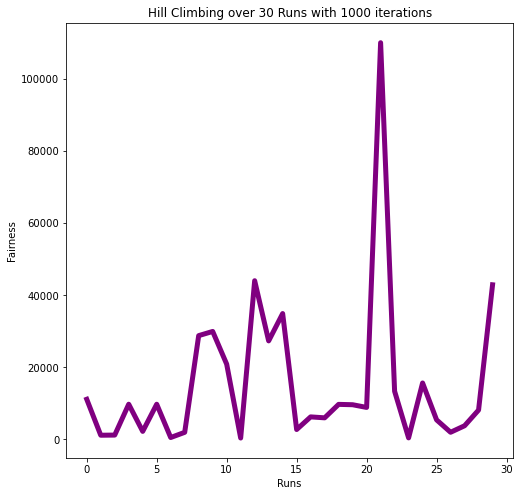

The average fairness over 30 runs with 1000 iterations for Hill Climbing was 15646.87


In [11]:
%matplotlib inline  
import matplotlib.pyplot as plt 

# The number of runs to loop Hill CLimbing for
runs = 30 

# The number of iterations to perform Hill Climbing for
hillclimbing_iterations = 1000

# Perform hill climbing and store the list of best fairnesses
hill_climbing_best_fairness = []

# Loop for the number of runs, appends the best fairness from Hill Climbing 
for i in range(runs):
    # Store the temporary best fairness list for this run
    hill_climbing_temp_list = hill_climbing(hillclimbing_iterations)[2]

    # Append the minimum (best fairness value) to the hill climbing best fairnesses
    hill_climbing_best_fairness.append(min(hill_climbing_temp_list))
    
# Set the y axis to the list of best fairness values returned by Hill Climbing
y = hill_climbing_best_fairness

# Plot line plot over 30 runs with 1000 iterations
fig, ax = plt.subplots(figsize=(8, 8))

plt.plot(y, color="purple", linewidth=5)

plt.ylabel("Fairness")

plt.xlabel("Runs")

plt.title("Hill Climbing over 30 Runs with 1000 iterations")

plt.show()

# Using numpy get the average fairness over the 30 runs for Hill Climbing
avg_fairness = np.average(hill_climbing_best_fairness)

print(f"The average fairness over 30 runs with 1000 iterations for Hill Climbing was {avg_fairness:.2f}")

## Hill Climb vs Random Search

### The following distribution box plots show 30 Hill Climbing and Random Search runs over 1000 iterations

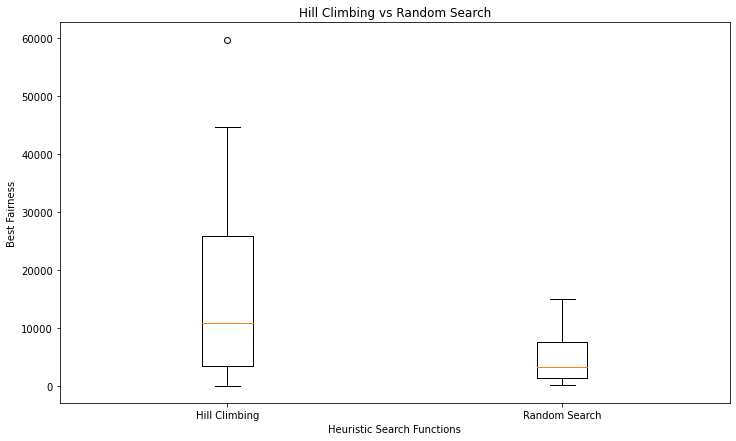

The best fairnesses for Hill Climbing:
[9759, 16937, 4149, 11987, 59737, 3435, 29761, 44577, 44453, 725, 32521, 43203, 4251, 25461, 25947, 4543, 39551, 15329, 3421, 24731, 1905, 2397, 2689, 2029, 17459, 2899, 3305, 4341, 15, 17495]
The best fairnesses for Random Search:
[477, 2305, 803, 3119, 3377, 3261, 4681, 8587, 9807, 169, 8545, 4771, 8837, 703, 221, 4005, 3165, 257, 1667, 4357, 10735, 11567, 14997, 3307, 573, 1201, 3243, 3743, 11429, 2681]
Best fairness for hill climbing: 15
Best fairness for random search: 169


In [14]:
%matplotlib inline               

import matplotlib.pyplot as plt
 
# The number of runs to loop both Hill Climbing and Random Search for
runs = 30

# The number of iterations to perform Hill Climbing and Random Search for
iterations = 1000

# A list responsible for storing the best fairnesses for Hill Climbing
hill_climbing_best_fairness = []

# A list responsible for storing the best fairnesses for Random Search
random_search_best_fairness = []

# Loop for the number of runs, appends the best fairness from Hill Climbing and Random Search
for i in range(runs):
    # Store the temporary best fairness list for this run
    hill_climbing_temp_list = hill_climbing(iterations)[2]

    # Append the minimum (best fairness value) to the hill climbing best fairnesses
    hill_climbing_best_fairness.append(min(hill_climbing_temp_list))

    # Get the random search fairness value for this run
    random_search_run_fairness = random_search(iterations)[1]

    # Append the random search fairness value to the random search best fairnesses
    random_search_best_fairness.append(random_search_run_fairness)

fig, ax = plt.subplots(figsize=(12, 7))

# Using box plots, plot the distribution of both Hill Climbing and Random Search side by side
plt.boxplot([hill_climbing_best_fairness, random_search_best_fairness], labels=["Hill Climbing", "Random Search"])

plt.title("Hill Climbing vs Random Search")

plt.ylabel("Best Fairness")

plt.xlabel("Heuristic Search Functions")

plt.show()

print(f"The best fairnesses for Hill Climbing:\n{hill_climbing_best_fairness}")

print(f"The best fairnesses for Random Search:\n{random_search_best_fairness}")

print(f"Best fairness for hill climbing: {min(hill_climbing_best_fairness)}")

print(f"Best fairness for random search: {min(random_search_best_fairness)}")

## Conclusion

#### In our testing, Random Search seemed to be the more stable performer and usually has distributions which contain fairer splits than Hill Climbing. However, this could be due to the random nature of Random Search and the fact that Hill Climbing is not optimised. If Hill Climbing was optimised, we predict it would likely outperform Random Search. In this example, we used 1000 iterations with 30 runs. The more time that is given to Random Search improves its output.

## Example of the best solution found

### This shows a solution which has a fairness of £1. There are other solutions which can achieve this.

In [13]:
# Store the binary list representation of one of the best solutions
best_found_solution = [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0]

# As Anne's values are based on zeros, create a list containing only their values
annes_split = [i for i in best_found_solution if i == 0]

# As Bob's values are based on ones, create a list containing only their values
bobs_split = [i for i in best_found_solution if i == 1]

# Get the number of pictures using the length of the split given to Anne
anne_num_pictures = len(annes_split)

# Get the number of pictures using the length of the split given to Anne
bob_num_pictures =  len(bobs_split)

# Calculate the individual totals for Anne & Bob so they can be displayed
annes_total, bobs_total = calculate_individual_totals(best_found_solution)

print(f"Anne got {anne_num_pictures} pictures and their total picture value was £{annes_total}")

print(f"Bob got {bob_num_pictures} pictures and their total picture value was £{bobs_total}")

# Evaluate the best found solution using the defined evaluate function to get the best fairness
best_found_fairness = evaluate(best_found_solution)

print(f"The best found fairness was £{best_found_fairness}")

Anne got 26 pictures and their total picture value was £13639436
Bob got 24 pictures and their total picture value was £13639435
The best found fairness was £1
